In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r"D:\customer churn project\Churn_Modelling.csv")

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# EDA 

In [4]:
df.isnull().sum()
# no missing values 

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
# no duplicate  values
(df[df.duplicated()])

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [6]:
df = df.rename(columns={'Exited' : 'churn'})

In [7]:
df.columns = df.columns.str.lower()


In [8]:
df.head(2)

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,churn
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [9]:
df.describe()

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,churn
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


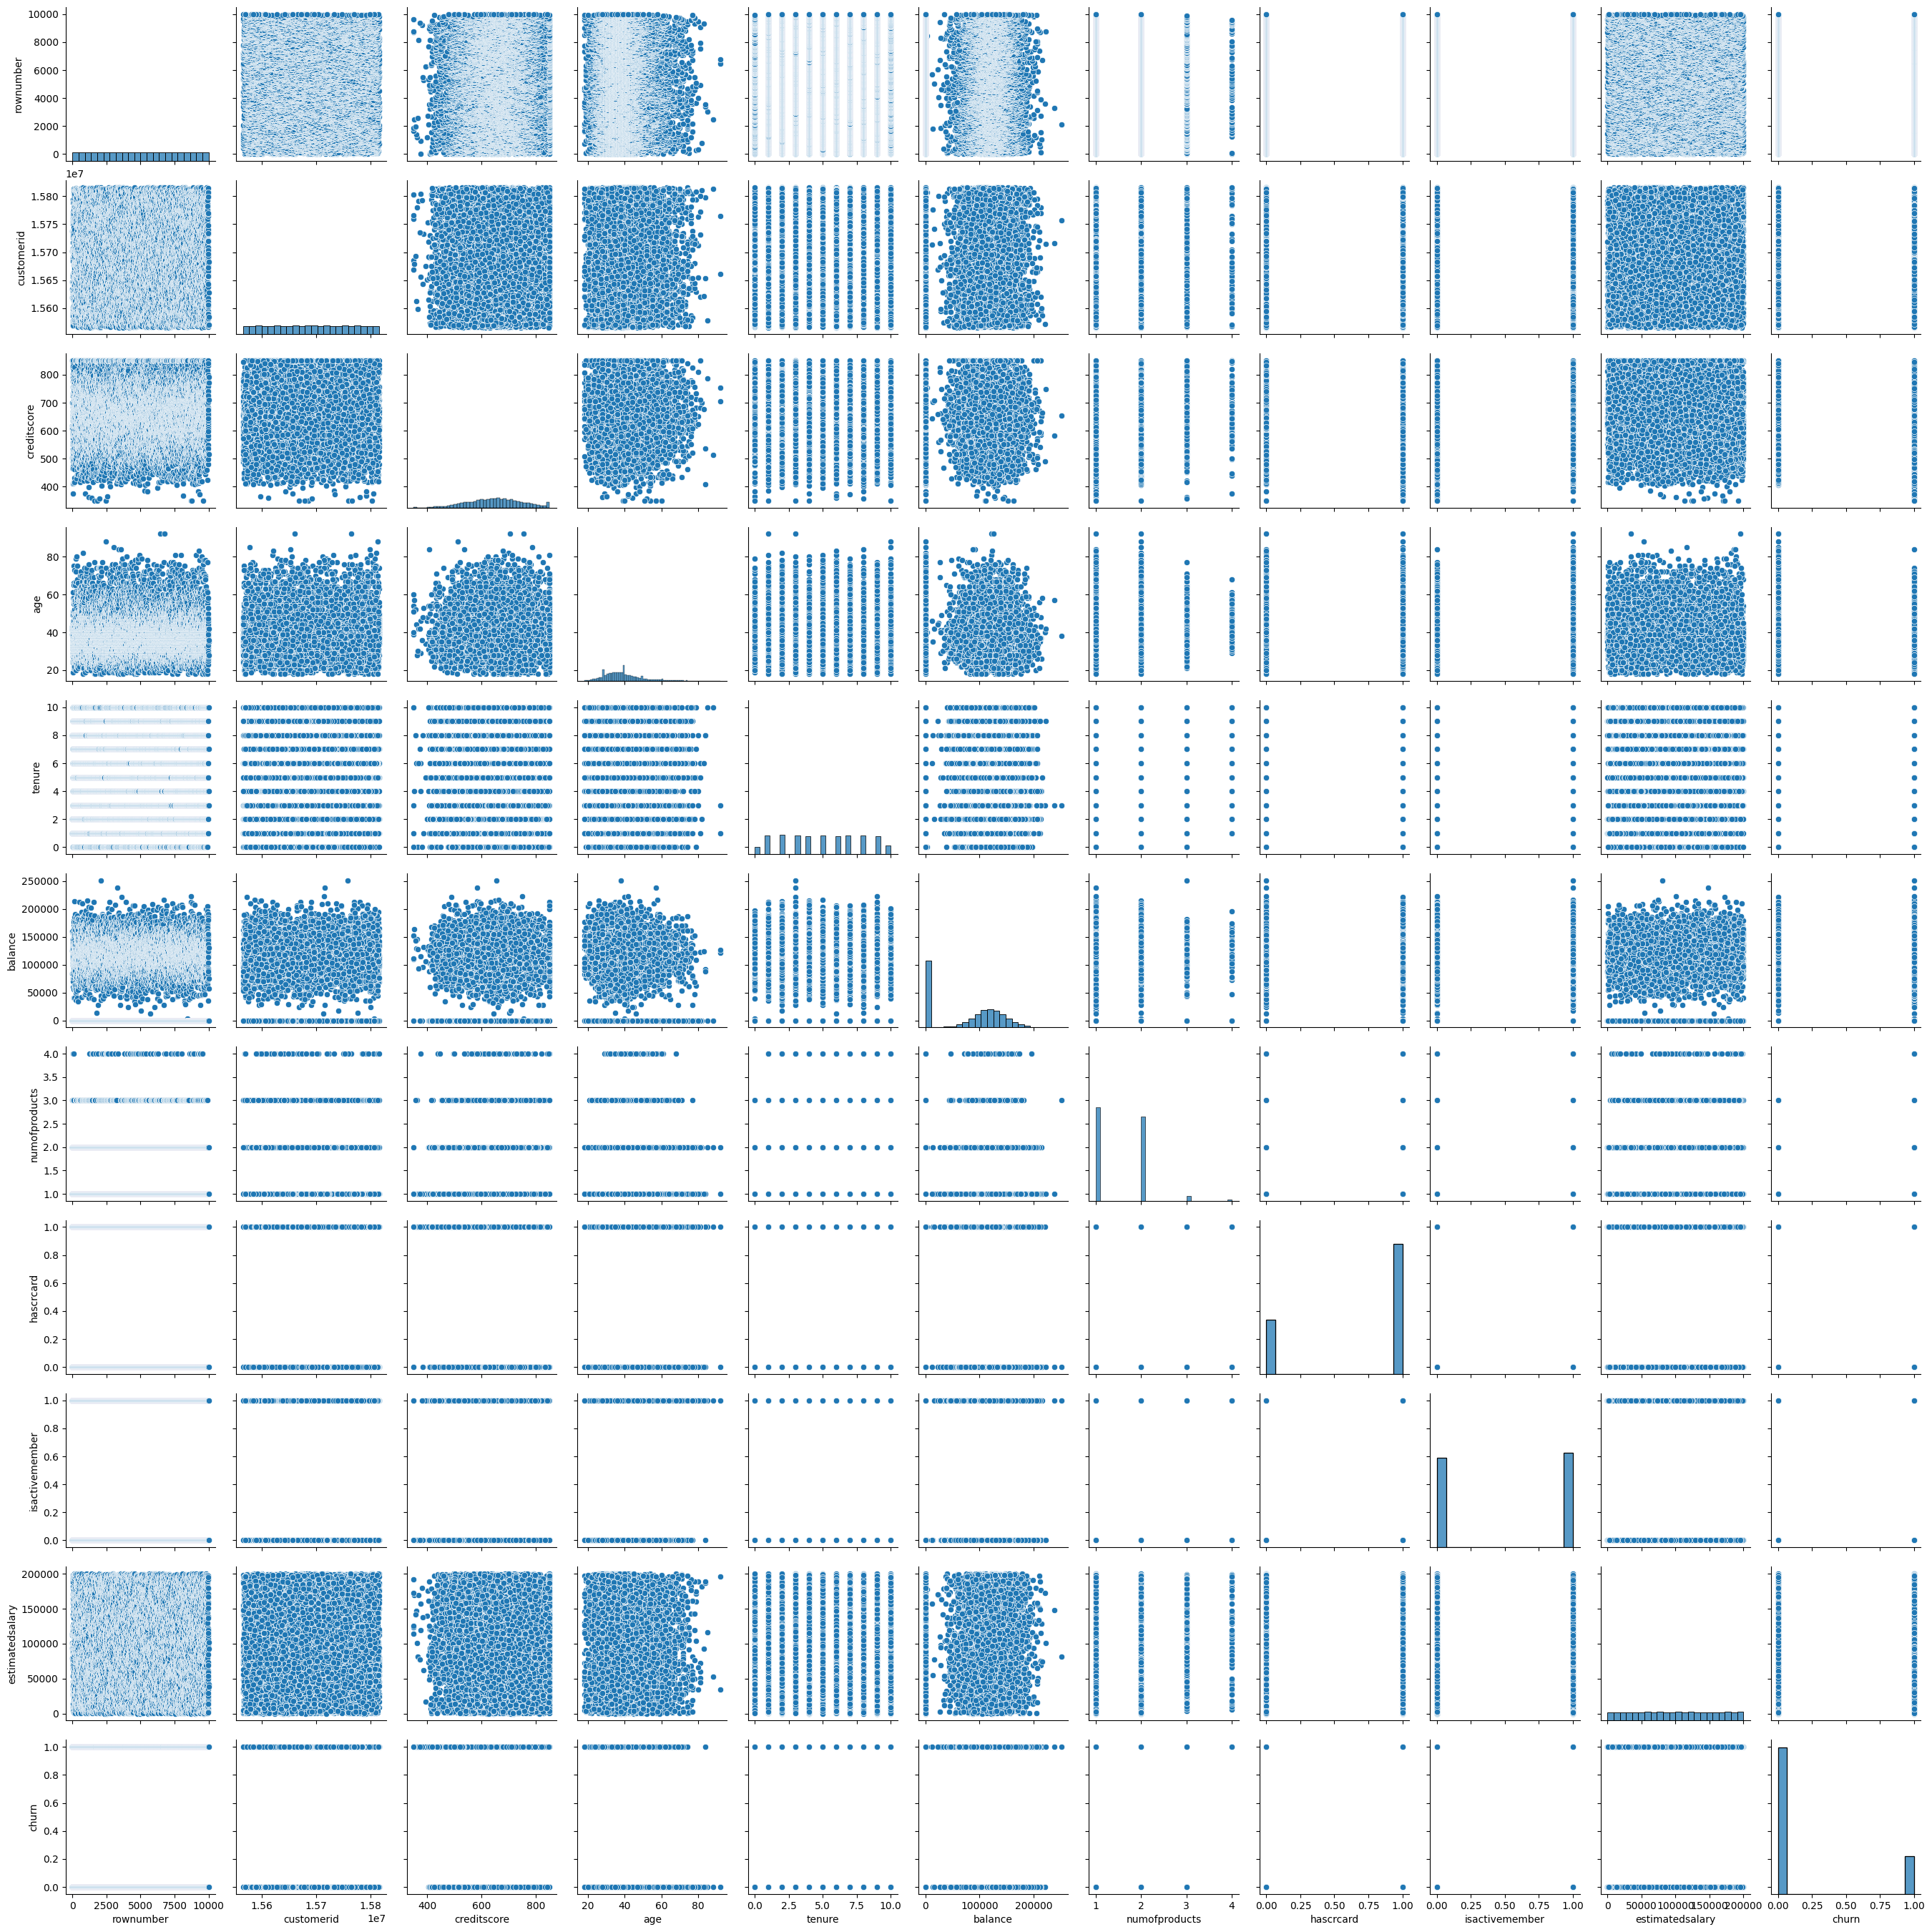

In [10]:
sns.pairplot(df)
plt.show()

In [11]:
df.head(2)

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,churn
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


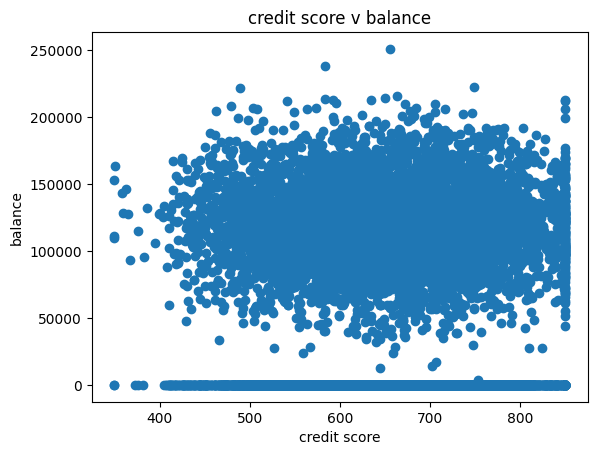

In [12]:
plt.scatter(df['creditscore'], df['balance'])
plt.xlabel('credit score')
plt.ylabel('balance')
plt.title('credit score v balance')
plt.show()


<Axes: xlabel='estimatedsalary', ylabel='gender'>

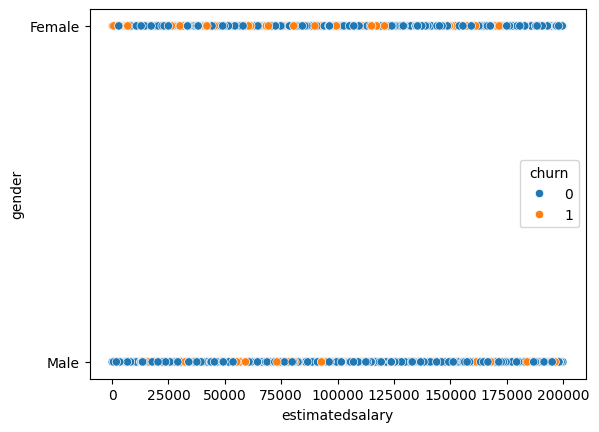

In [13]:
sns.scatterplot(data=df, x='estimatedsalary', y='gender', hue='churn')

In [14]:
df.head(2)

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,churn
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


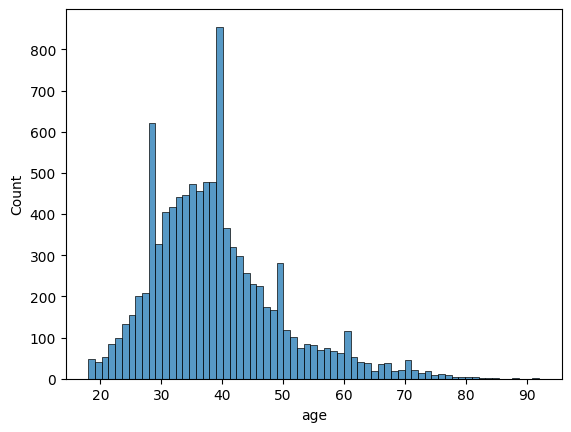

In [15]:
sns.histplot(df['age'])
plt.show()

<Axes: xlabel='age', ylabel='Count'>

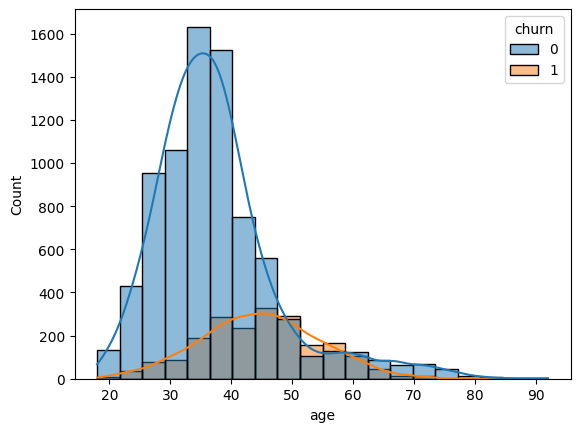

In [16]:
sns.histplot(data=df, x='age', bins=20, kde=True, hue='churn')


In [17]:
df['churn'].unique()

array([1, 0], dtype=int64)

In [18]:
print(df[df['churn'] == 1].head())


    rownumber  customerid   surname  creditscore geography  gender  age  \
0           1    15634602  Hargrave          619    France  Female   42   
2           3    15619304      Onio          502    France  Female   42   
5           6    15574012       Chu          645     Spain    Male   44   
7           8    15656148    Obinna          376   Germany  Female   29   
16         17    15737452     Romeo          653   Germany    Male   58   

    tenure    balance  numofproducts  hascrcard  isactivemember  \
0        2       0.00              1          1               1   
2        8  159660.80              3          1               0   
5        8  113755.78              2          1               0   
7        4  115046.74              4          1               0   
16       1  132602.88              1          1               0   

    estimatedsalary  churn  
0         101348.88      1  
2         113931.57      1  
5         149756.71      1  
7         119346.88      1  
1

In [19]:
df['churn'].dtype

dtype('int64')

In [20]:
df['churn'].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

In [21]:
df.groupby('churn')[['isactivemember','tenure','balance','creditscore','age']].mean()


,isactivemember,tenure,balance,creditscore,age
churn,,,,,
0,0.554565,5.033279,72745.296779,651.853196,37.408389
1,0.360825,4.932744,91108.539337,645.351497,44.837997


In [22]:
numeric_cols = df.select_dtypes(include=['int64','float64'])

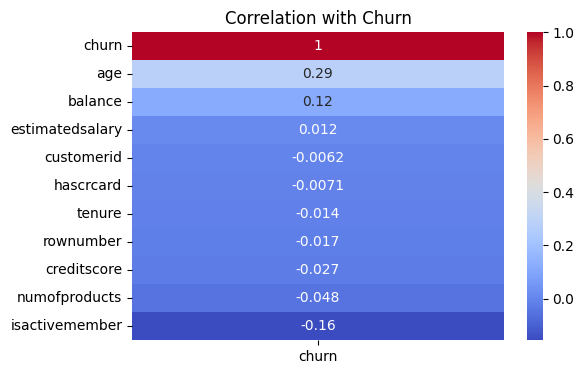

In [23]:
plt.figure(figsize=(6,4))
sns.heatmap(numeric_cols.corr()[['churn']].sort_values(by='churn', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Churn')
plt.show()

In [24]:
corr = numeric_cols.corr()['churn'].sort_values(ascending=False)
print(corr)

churn              1.000000
age                0.285323
balance            0.118533
estimatedsalary    0.012097
customerid        -0.006248
hascrcard         -0.007138
tenure            -0.014001
rownumber         -0.016571
creditscore       -0.027094
numofproducts     -0.047820
isactivemember    -0.156128
Name: churn, dtype: float64


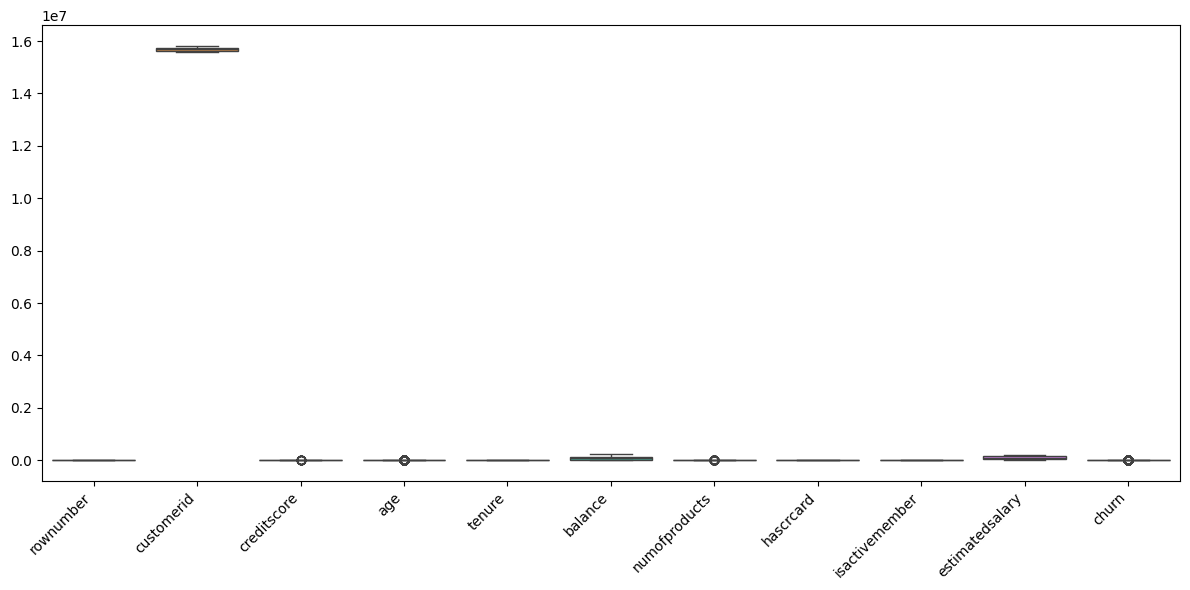

In [25]:
# checking any outliers 
plt.figure(figsize=(12, 6))
sns.boxplot(df)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# feature selection or feature engineering 

In [26]:
df = df.drop(columns=['rownumber','customerid',	'surname'], axis =1)

In [27]:
df = pd.get_dummies(df, columns=['geography'], drop_first=True)
df[['geography_Germany', 'geography_Spain']] = df[['geography_Germany', 'geography_Spain']].astype(int)



In [28]:
df

,creditscore,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,churn,geography_Germany,geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,0,0,0
9996,516,Male,35,10,57369.61,1,1,1,101699.77,0,0,0
9997,709,Female,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,Male,42,3,75075.31,2,1,0,92888.52,1,1,0


In [29]:
corr_geo = df[['geography_Germany', 'geography_Spain', 'churn']].corr()['churn']
print(corr_geo)

geography_Germany    0.173488
geography_Spain     -0.052667
churn                1.000000
Name: churn, dtype: float64


In [31]:
# encoding gender column
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})


In [33]:
df['gender'].unique()

array([0, 1], dtype=int64)

In [36]:
df = df.drop(columns=['estimatedsalary'], axis = 1)

In [37]:
df

,creditscore,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,churn,geography_Germany,geography_Spain
0,619,0,42,2,0.00,1,1,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,0,0,1
2,502,0,42,8,159660.80,3,1,0,1,0,0
3,699,0,39,1,0.00,2,0,0,0,0,0
4,850,0,43,2,125510.82,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,0,0,0
9996,516,1,35,10,57369.61,1,1,1,0,0,0
9997,709,0,36,7,0.00,1,0,1,1,0,0
9998,772,1,42,3,75075.31,2,1,0,1,1,0


In [38]:
df.to_csv(r"D:\customer churn project\cleaned_csv_file Churn_Modelling.csv", index = False)

In [39]:
import os
os.getcwd()

'D:\\customer churn project'